<a href="https://colab.research.google.com/github/AIME1995/AIME1995/blob/main/Pr%C3%A9diction_data_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etude sur l'évenement de **titanic**


# Importation des librariries et des données


In [1]:
# Libraries et fonction
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Identifier les bases de donnée dans seaborn
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
from os import name
df = sns.load_dataset('titanic')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# Le nom de toutes les variables
print(df.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


**Description des variables :**

**Survived** : Indique si le passager a survécu ou non au naufrage du Titanic (0 pour non survécu, 1 pour survécu).

**Pclass** : La classe du billet du passager (1ère classe, 2ème classe, 3ème classe).

**Sex** : Le sexe du passager (masculin ou féminin).

**Age** : L'âge du passager.

**SibSp** : Le nombre de frères, sœurs ou conjoints du passager à bord du Titanic.

**Parch** : Le nombre de parents ou d'enfants du passager à bord du Titanic.

**Fare** : Le tarif payé par le passager pour son voyage.

**Embarked** : Le port d'embarquement du passager (C = Cherbourg, Q = Queenstown, S = Southampton).

**Class** : Équivalent à la variable "Pclass" mais avec des noms de classe (par exemple, "1st" pour la 1ère classe).

**Who** : Une variable qui indique si le passager était un homme, une femme ou un enfant.

**Adult_male** : Une variable binaire indiquant si le passager est un adulte de sexe masculin (1 pour vrai, 0 pour faux).

**Deck** : Le pont où se trouvait la cabine du passager.

**Embark_town** : Le nom de la ville de l'embarquement (équivalent à "Embarked" mais avec des noms de ville).

**Alive** : Indique si le passager est en vie ou non (utilisé pour des données historiques).

**Alone** : Une variable binaire indiquant si le passager voyageait seul (1 pour vrai, 0 pour faux).



In [5]:
# suprimer les informations rédondantes
df=df.drop(['alive', 'who', 'embarked', 'class', 'deck'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(2)
memory usage: 57.6+ KB


# **Visualisation des données**


## **Analyse univarié**

La visualisation permet de comprendre des données

<Axes: xlabel='survived', ylabel='count'>

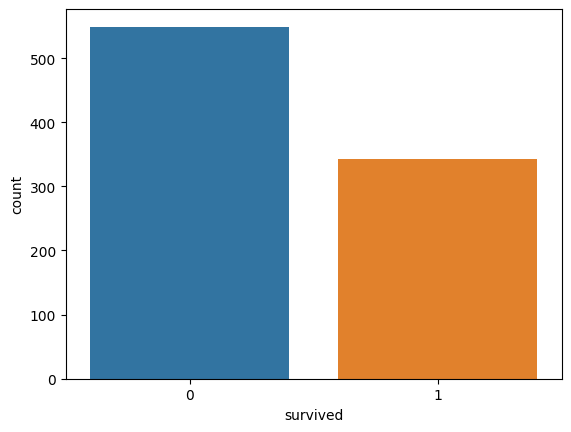

In [6]:
sns.countplot(x="survived", data =df)

Il y a plus de morts dans le nofrage que de survivant.



In [7]:
# la variable survived
df['survived'].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

<Axes: xlabel='pclass', ylabel='count'>

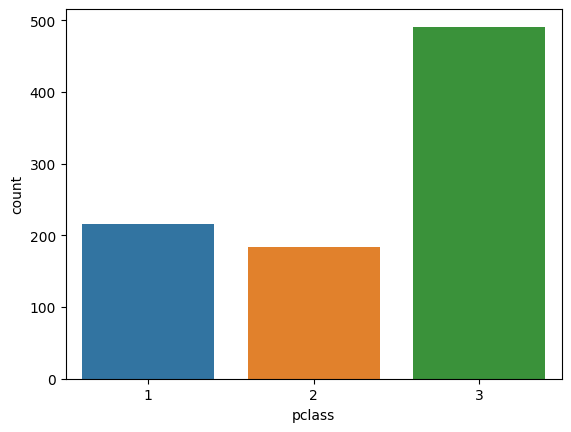

In [8]:
# la varible pclass
sns.countplot(x="pclass", data =df)

Il y plus des gens de classe 3 que de classe 1 et 2. Ce qui fera dire qu'il y a eu plus de riche que de pauvre si on peut le dire ainsi.

<Axes: xlabel='sex', ylabel='count'>

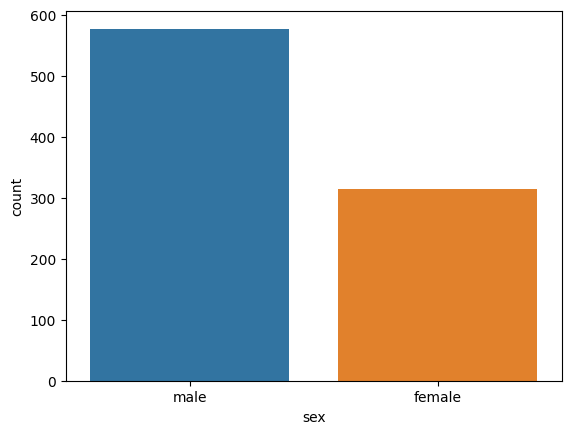

In [9]:
# la variable sex
sns.countplot(x="sex", data =df)

<Axes: xlabel='sibsp', ylabel='count'>

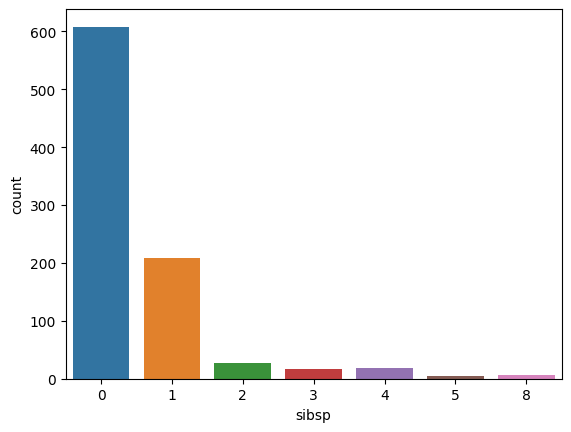

In [10]:
# La variable SibSp
sns.countplot(x="sibsp", data =df)

Il y a plus de passager qui n'ont pas de famille à bord. Suivi des des gens avec une membre de leur famille à bord, 2 membres, 3 membres, 4 memebres, 5 memebres et 8 membres.

<Axes: ylabel='fare'>

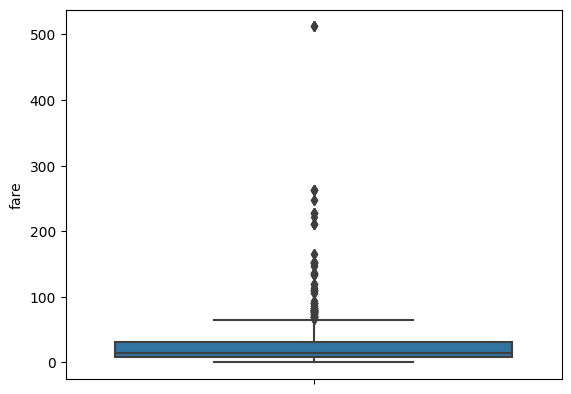

In [11]:
# La varible fare
sns.boxplot(y='fare', data=df)

<ipython-input-12-53549dfaa889>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare'], kde=False)


<Axes: xlabel='fare'>

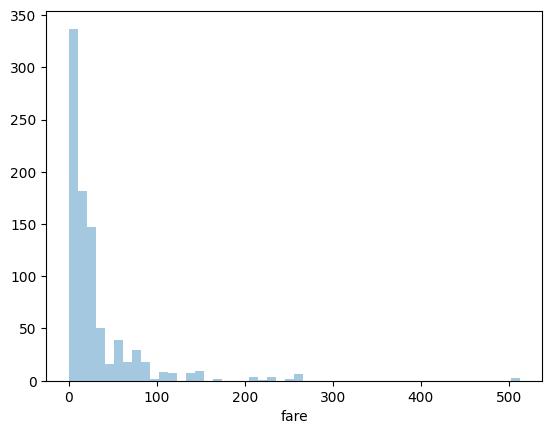

In [12]:
sns.distplot(df['fare'], kde=False)

Il y a beaucoup de variables abérentes dans base. Et ça se omprend par le fait qu'il y a peu de passager qui ont payer chère. Les valeurs extremes ne sont pas représentatif de l'ensemble de donnée. Les valeurs abérantes rendent la variable assymétrique.

<Axes: xlabel='adult_male', ylabel='count'>

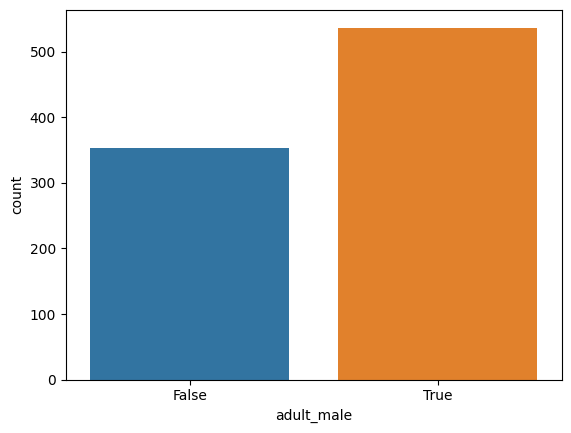

In [13]:
# la variable adulte_male
sns.countplot(x="adult_male", data =df)

In [14]:
pd.crosstab(df["sex"], df["adult_male"])

adult_male,False,True
sex,,
female,314,0
male,40,537


<Axes: xlabel='embark_town', ylabel='count'>

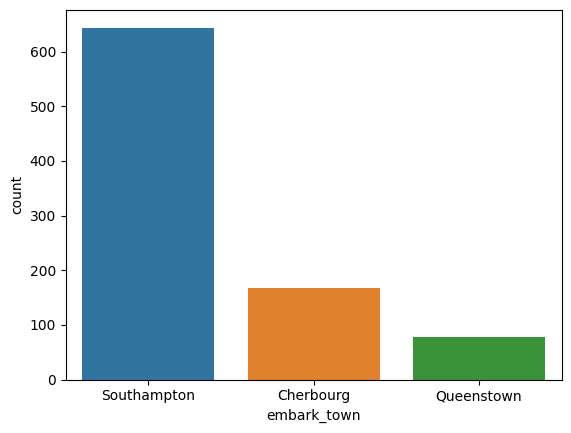

In [15]:
# La variable embark_town
sns.countplot(x="embark_town", data=df)

La majorité des passager ont embarqué à Southampton et après les passager de Cherbourg et Queenstown.


<Axes: xlabel='alone', ylabel='count'>

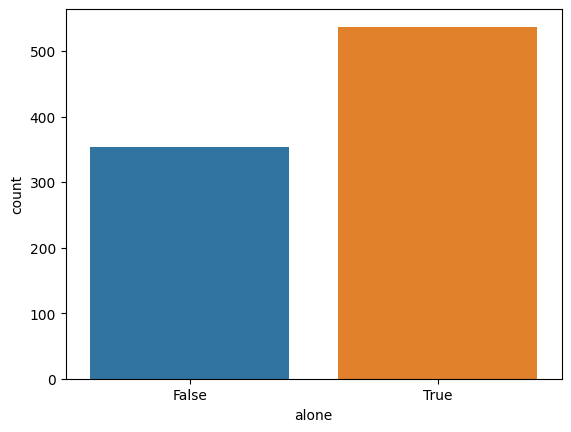

In [16]:
# La variable alone
sns.countplot(x="alone", data=df)

La plupart des passagers sont seuls.

<Axes: ylabel='age'>

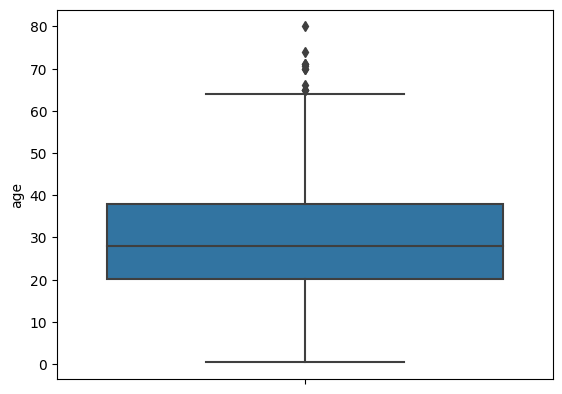

In [17]:
# La varaible age
sns.boxplot(y="age", data=df)

<ipython-input-18-ad8b2455bee4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], kde=False)


<Axes: xlabel='age'>

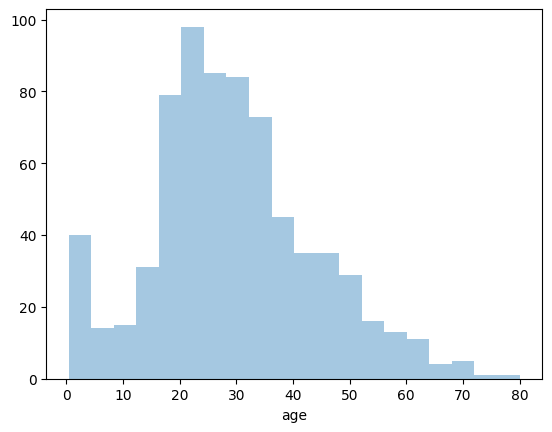

In [18]:
sns.distplot(df['age'], kde=False)

La variable age n'est pas assymétrique comme le veut la loi de gausss. Ceci est du aux valeurs extrèmes.

## **Analyse bi-variée**

<Axes: xlabel='survived', ylabel='age'>

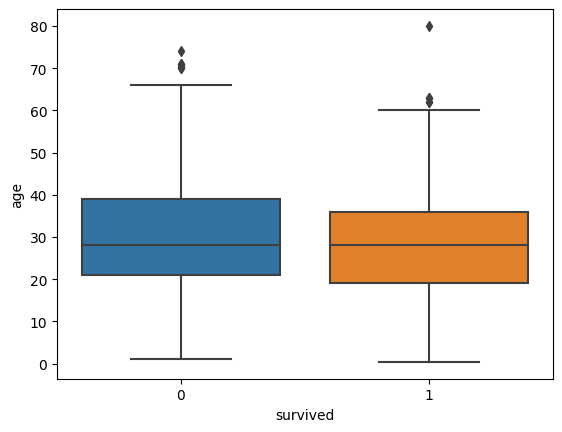

In [19]:
## Rela tion entre l'age et la variable cible
sns.boxplot(x='survived', y = 'age', data=df)

On a presque les memes distribution entre les personnes qui ont survécues et l'age meme si on observe que les personnes jeunes ont survécues que les personnes agées.


<Axes: xlabel='survived', ylabel='age'>

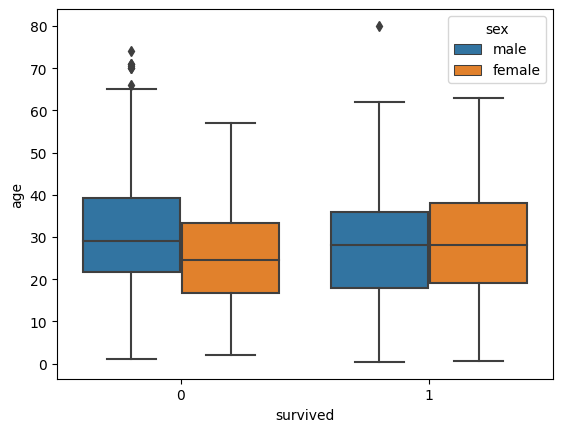

In [20]:
sns.boxplot(x='survived', y='age', hue= 'sex', data=df)


Les hommes ont survécu que les femmes et les jeunes ont légerement survecu que les personnes agèes.

<Axes: xlabel='survived', ylabel='fare'>

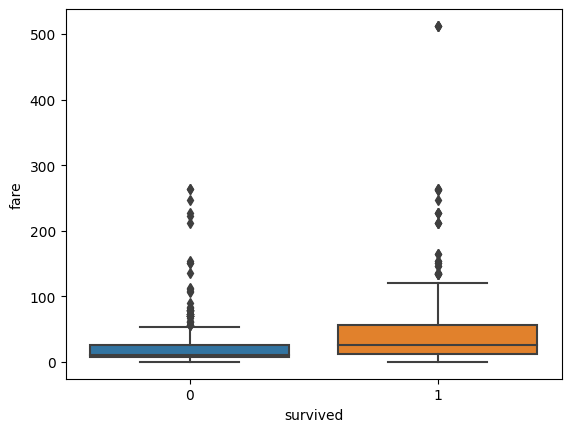

In [21]:
sns.boxplot(x='survived', y='fare', data=df)

<Axes: xlabel='survived', ylabel='fare'>

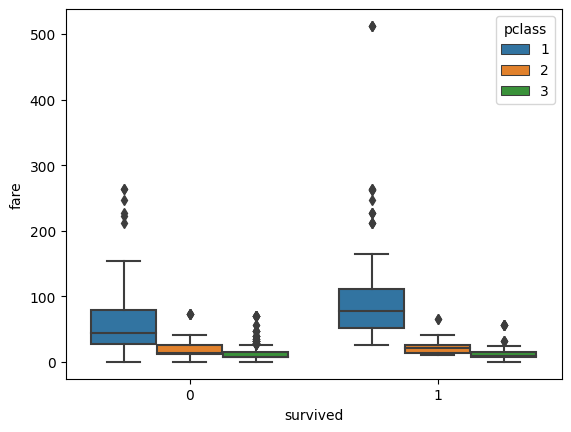

In [22]:
sns.boxplot(x='survived', y='fare', hue="pclass", data=df)

<Axes: xlabel='survived', ylabel='fare'>

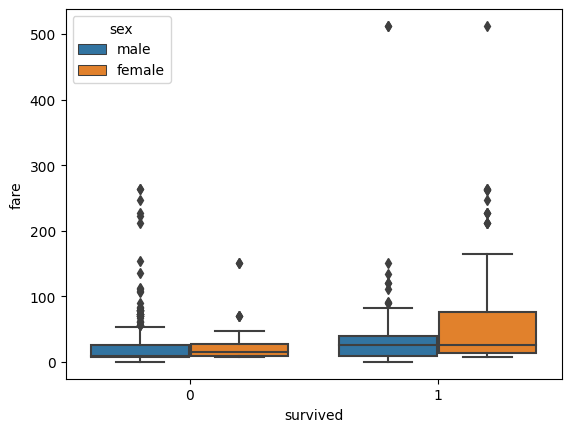

In [23]:
sns.boxplot(x='survived', y='fare', hue="sex", data=df)

In [24]:
#Le résumé statistique des variables numériques
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
df['fare'].quantile(0.99)

249.00622000000035

Au vue des données statistiques on voit qu'il y de valeur abérantes.

# Nettoyage des données

## Les valeurs manquantes

In [26]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
adult_male       0
embark_town      2
alone            0
dtype: int64

Dans la variable age on varemplacer les valeurs manquantes par la moyenne.

In [27]:
df.fillna(value={'age':df['age'].median()}, inplace=True)
df["age"].std()

13.019696550973201

In [28]:
# La variable embark_town
df['embark_town'].value_counts(normalize=True)

Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: embark_town, dtype: float64

 On va remplacer les valeurs manquantes de embark_town par Southampton

In [29]:
df.fillna(value={'embark_town':"Southampton"}, inplace=True)

In [30]:
df.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
embark_town    0
alone          0
dtype: int64

Il n'ya plus de valeurs manquants.

## La gestion des données abérantes

En statistique on dit qu'une valeur est abérente si elle est inférieur au premier quartile moins 1.5 multiplié par l'interquartile ou si la valeur est supérieur au troisième quartile + 1.5 multiplié par l'interquartille.

In [31]:
from numpy.lib.function_base import quantile
# indentifions les valeurs abérentes
def finding_outliers(data, variable_name):
  iqr = data[variable_name].quantile(0.75)-data[variable_name].quantile(0.25)
  lower = data[variable_name].quantile(0.25) - 1.5 * iqr
  upper = data[variable_name].quantile(0.75) + 1.5 * iqr
  return data[(data[variable_name] < lower) | (data[variable_name] > upper)]

In [32]:
finding_outliers(df, 'fare').sort_values('fare')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
336,0,1,male,29.0,1,0,66.6000,True,Southampton,False
151,1,1,female,22.0,1,0,66.6000,False,Southampton,False
369,1,1,female,24.0,0,0,69.3000,False,Cherbourg,True
641,1,1,female,24.0,0,0,69.3000,False,Cherbourg,True
846,0,3,male,28.0,8,2,69.5500,True,Southampton,False
...,...,...,...,...,...,...,...,...,...,...
27,0,1,male,19.0,3,2,263.0000,True,Southampton,False
341,1,1,female,24.0,3,2,263.0000,False,Southampton,False
679,1,1,male,36.0,0,1,512.3292,True,Cherbourg,False
737,1,1,male,35.0,0,0,512.3292,True,Cherbourg,True


In [33]:
iqr_fare = df['fare'].quantile(0.75) -  df['fare'].quantile(0.25)
iqr_fare
df['fare'].quantile(0.75)+1.5*iqr_fare

65.6344

In [34]:
df.loc[(finding_outliers(df, 'fare').index, 'fare')]=df['fare'].quantile(0.75)+1.5*iqr_fare

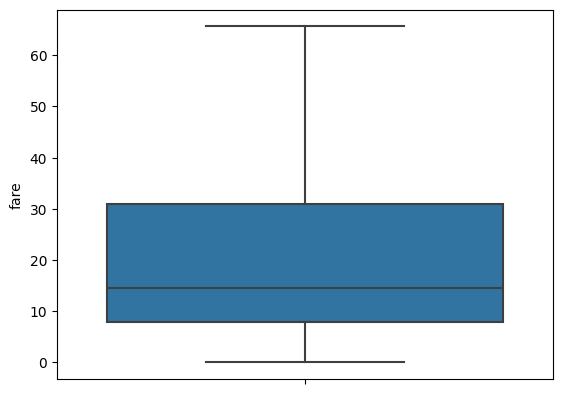

In [35]:
sns.boxplot(y='fare', data =df);

Le cas de la variable age

In [36]:
df['age'].quantile(0.25) - 1.5*(df["age"].quantile(0.75) - df["age"].quantile(0.25))



2.5

In [37]:
df['age'].quantile(0.75) + 1.5*(df["age"].quantile(0.75) - df["age"].quantile(0.25))



54.5

In [38]:
finding_outliers(df, "age").sort_values('age')

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
803,1,3,male,0.42,0,1,8.5167,False,Cherbourg,False
755,1,2,male,0.67,1,1,14.5000,False,Southampton,False
469,1,3,female,0.75,2,1,19.2583,False,Cherbourg,False
644,1,3,female,0.75,2,1,19.2583,False,Cherbourg,False
831,1,2,male,0.83,1,1,18.7500,False,Southampton,False
...,...,...,...,...,...,...,...,...,...,...
116,0,3,male,70.50,0,0,7.7500,True,Queenstown,True
96,0,1,male,71.00,0,0,34.6542,True,Cherbourg,True
493,0,1,male,71.00,0,0,49.5042,True,Cherbourg,True
851,0,3,male,74.00,0,0,7.7750,True,Southampton,True


In [39]:
df.loc[df["age"] < df['age'].quantile(0.25) - 1.5*(df["age"].quantile(0.75) - df["age"].quantile(0.25)),
       "age"] = df['age'].quantile(0.25) - 1.5*(df["age"].quantile(0.75) - df["age"].quantile(0.25))

In [40]:
df.loc[df["age"] > df['age'].quantile(0.75) + 1.5*(df["age"].quantile(0.75) - df["age"].quantile(0.25)),
       "age"] = df['age'].quantile(0.75) + 1.5*(df["age"].quantile(0.75) - df["age"].quantile(0.25))

<Axes: ylabel='age'>

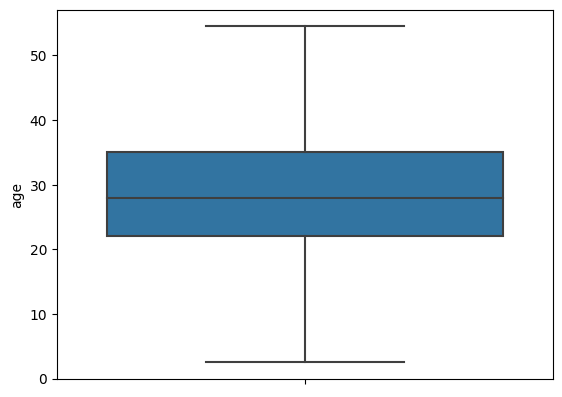

In [41]:
sns.boxplot(y = 'age', data=df)

In [42]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,True,Southampton,False
1,1,1,female,38.0,1,0,65.6344,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,True,Southampton,True


# Préparation des données

In [43]:
# coder la variable sex
df['sex'].replace({"female" :0, "male":1}, inplace = True)


In [44]:
# coder la variable alone et adult male
df['alone']=df['alone'].astype('int')
df['adult_male']=df['adult_male'].astype('int')


In [45]:
embark_dumies = pd.get_dummies(df['embark_town'], drop_first=True)
embark_dumies

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [46]:
df = pd.concat([df, embark_dumies], axis=1)

In [47]:
del df['embark_town']

In [48]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alone,Queenstown,Southampton
0,0,3,1,22.0,1,0,7.2500,1,0,0,1
1,1,1,0,38.0,1,0,65.6344,0,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,1,0,1


In [49]:
df['family'] = df['sibsp'] + df['parch']

In [50]:
df.drop(['sibsp', 'parch'], axis = 1, inplace =True)

In [51]:
df.head(3)

,survived,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family
0,0,3,1,22.0,7.2500,1,0,0,1,1
1,1,1,0,38.0,65.6344,0,0,0,0,1
2,1,3,0,26.0,7.9250,0,1,0,1,0


La division des données

In [52]:
# Division des données 60% pour train, 20% pour validation et 20% pour test
from sklearn.model_selection import train_test_split
seed =111
x= df.drop('survived', axis = 1)
y=df['survived']

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,
                                                    random_state=seed, stratify=y)

x_val, x_test, y_val, y_test = train_test_split(x_test,y_test, test_size = 0.5,
                                                    random_state=seed, stratify=y_test)


In [53]:
y.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [54]:
y_val.value_counts(normalize=True)

0    0.617978
1    0.382022
Name: survived, dtype: float64

In [55]:
y_test.value_counts(normalize=True)

0    0.614525
1    0.385475
Name: survived, dtype: float64

##La normalisation des données

## **Résolution du problème de déséquilibre des classes:** il y a deux méthoes. Ce sont des méthoedes de réchantillonnage. Soit on gonfle la classe inférieur ou soit on diminue la claase supérieur pour les ramener au meme niveau.  

In [56]:
# Méthode de: sur-échantillonnage
from sklearn.utils import resample

x2 = x_train
x2['survived'] = y_train.values
x2.head()

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
692,3,1,28.0,56.4958,1,1,0,1,0,1
150,2,1,51.0,12.5250,1,1,0,1,0,0
886,2,1,27.0,13.0000,1,1,0,1,0,0
151,1,0,22.0,65.6344,0,0,0,1,1,1
149,2,1,42.0,13.0000,1,1,0,1,0,0


In [57]:
# Definissons des classes minoritaires et majorit ires
minority = x2[x2.survived==1]
majority = x2[x2.survived==0]

minority_upsample = resample(minority, replace=True, n_samples=len(majority))
minority_upsample

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
755,2,1,2.5,14.5000,0,0,0,1,2,1
858,3,0,24.0,19.2583,0,0,0,0,3,1
469,3,0,2.5,19.2583,0,0,0,0,3,1
146,3,1,27.0,7.7958,1,1,0,1,0,1
248,1,1,37.0,52.5542,1,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...
823,3,0,27.0,12.4750,0,0,0,1,1,1
802,1,1,11.0,65.6344,0,0,0,1,3,1
394,3,0,24.0,16.7000,0,0,0,1,2,1
651,2,0,18.0,23.0000,0,0,0,1,1,1


In [58]:
# concatener les deux classes
# Concaténer les deux classes
upsampled = pd.concat([majority, minority_upsample], axis=0)
upsampled


,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
150,2,1,51.0,12.5250,1,1,0,1,0,0
886,2,1,27.0,13.0000,1,1,0,1,0,0
149,2,1,42.0,13.0000,1,1,0,1,0,0
249,2,1,54.0,26.0000,1,0,0,1,1,0
464,3,1,28.0,8.0500,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
823,3,0,27.0,12.4750,0,0,0,1,1,1
802,1,1,11.0,65.6344,0,0,0,1,3,1
394,3,0,24.0,16.7000,0,0,0,1,2,1
651,2,0,18.0,23.0000,0,0,0,1,1,1


In [59]:
upsampled['survived'].value_counts(normalize=True)

0    0.5
1    0.5
Name: survived, dtype: float64

In [60]:
x_train_up = upsampled.drop('survived', axis = 1)
y_train_up = upsampled['survived']

In [61]:
# La méthode sous échantillonage
mojority_downsampled = resample(majority, replace=False, n_samples=len(minority))
mojority_downsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
352,3,1,15.0,7.2292,0,0,0,0,2,0
80,3,1,22.0,9.0000,1,1,0,1,0,0
616,3,1,34.0,14.4000,1,0,0,1,2,0
245,1,1,44.0,65.6344,1,0,1,0,2,0
464,3,1,28.0,8.0500,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
739,3,1,28.0,7.8958,1,1,0,1,0,0
837,3,1,28.0,8.0500,1,1,0,1,0,0
174,1,1,54.5,30.6958,1,1,0,0,0,0
661,3,1,40.0,7.2250,1,1,0,0,0,0


In [62]:
downsampled=pd.concat([mojority_downsampled, minority])
downsampled

,pclass,sex,age,fare,adult_male,alone,Queenstown,Southampton,family,survived
352,3,1,15.0,7.2292,0,0,0,0,2,0
80,3,1,22.0,9.0000,1,1,0,1,0,0
616,3,1,34.0,14.4000,1,0,0,1,2,0
245,1,1,44.0,65.6344,1,0,1,0,2,0
464,3,1,28.0,8.0500,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
869,3,1,4.0,11.1333,0,0,0,1,2,1
720,2,0,6.0,33.0000,0,0,0,1,1,1
445,1,1,4.0,65.6344,0,0,0,1,2,1
469,3,0,2.5,19.2583,0,0,0,0,3,1


In [63]:
# Les données d'entrainement
x_train_down = downsampled.drop(['survived'], axis=1)
y_train_down = downsampled['survived']

# La modèlisation

Avant la modélisation il faut sélectionner les variables importantes.

In [64]:
# sélectionner les variables importantes
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(random_state=seed)
rf.fit(x_train_up, y_train_up)
accuracy_score(y_val, rf.predict(x_val))

0.7696629213483146

In [65]:
print(x_train_up.columns)
print(rf.feature_importances_)

Index(['pclass', 'sex', 'age', 'fare', 'adult_male', 'alone', 'Queenstown',
       'Southampton', 'family'],
      dtype='object')
[0.06278978 0.11879839 0.23153183 0.25622503 0.20831473 0.01281788
 0.00965519 0.0198282  0.08003898]


In [66]:
# la visualisation
vars_imp = pd.Series(rf.feature_importances_, index=x_train_up.columns).sort_values(ascending=False)
vars_imp

fare           0.256225
age            0.231532
adult_male     0.208315
sex            0.118798
family         0.080039
pclass         0.062790
Southampton    0.019828
alone          0.012818
Queenstown     0.009655
dtype: float64

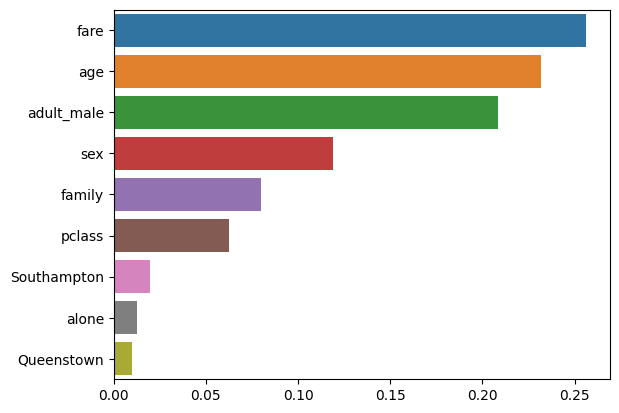

In [67]:
sns.barplot(x=vars_imp, y=vars_imp.index)
plt.show()

In [68]:
# enlevons les variables non importantes
vars_non_imp = ['Queenstown']
x_train_up = x_train_up.drop(vars_non_imp, axis = 1)
x_val = x_val.drop(vars_non_imp, axis = 1)
x_test = x_test.drop(vars_non_imp, axis = 1)


In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
GridSearchCV,
# La régression Logistiques
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr =LogisticRegression(random_state = seed, max_iter= 500)
lr_hyp = {'C':[0.001, 0.01, 0.1, 10, 100]}
lr_cv = GridSearchCV(lr, lr_hyp, cv=5)
lr_cv.fit(x_train_up, y_train_up)

print("Meilleur score:", lr_cv.best_score_)
print("Meilleur estimateur:", lr_cv.best_estimator_)


Meilleur score: 0.8100740226694425
Meilleur estimateur: LogisticRegression(C=10, max_iter=500, random_state=111)


In [72]:
# Regression: algorithme des foret aléatoires
RF = RandomForestClassifier(random_state=seed)

RF_hyp = {'n_estimators':[5, 10, 20, 50, 100, 200],
          'max_depth':[None, 2,5,10,15,20]}
RF_cv = GridSearchCV(RF, RF_hyp, cv =5)
RF_cv.fit(x_train_up, y_train_up)

print( RF_cv.best_score_)
print(RF_cv.best_estimator_)

0.8799791811242192
RandomForestClassifier(n_estimators=20, random_state=111)


In [76]:
# Regression: algorithme SVM
from sklearn.svm import SVC
sv = SVC(random_state = seed)
sv_hyp = {'C':[ 0.1, 1, 10],'kernel':['linear', 'rbf']}
svm_cv = GridSearchCV(sv, sv_hyp, cv=5)
svm_cv.fit(x_train_up, y_train_up)
print(svm_cv.best_score_)
print(svm_cv.best_estimator_)


0.8040481147351377
SVC(C=0.1, kernel='linear', random_state=111)


In [77]:
# Algorithme: Bagginng Classififier
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(random_state=seed)
bc_hyp = {'n_estimators':[5, 10, 20, 50, 100, 200]}
bc_cv = GridSearchCV(bc, bc_hyp, cv =5)
bc_cv.fit(x_train_up, y_train_up)

print(bc_cv.best_score_)
print(bc_cv.best_estimator_)



0.8663196854036549
BaggingClassifier(n_estimators=50, random_state=111)


In [81]:
# Evaluer la performance et le choix des meilleurs modèle

def model_evaluation(model, features, labels):
  pred = model.predict(features)
  score = accuracy_score(y_val, pred)
  print('score global du modèle :', round(score, 3))


In [83]:
models= [lr_cv.best_estimator_, RF_cv.best_estimator_,
         svm_cv.best_estimator_, bc_cv.best_estimator_]

for model in models:
  print('Modele' + str(model))
  model_evaluation(model, x_val, y_val)
  print('-'*90)

ModeleLogisticRegression(C=10, max_iter=500, random_state=111)
score global du modèle : 0.77
------------------------------------------------------------------------------------------
ModeleRandomForestClassifier(n_estimators=20, random_state=111)
score global du modèle : 0.742
------------------------------------------------------------------------------------------
ModeleSVC(C=0.1, kernel='linear', random_state=111)
score global du modèle : 0.758
------------------------------------------------------------------------------------------
ModeleBaggingClassifier(n_estimators=50, random_state=111)
score global du modèle : 0.77
------------------------------------------------------------------------------------------


In [84]:
# Evalustion des performances du modèle sur les données de test
accuracy_score(y_test, RF_cv.best_estimator_.predict(x_test))

0.8156424581005587

# Déploiement du modèle